In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
# Load your train,sub and test files

In [3]:
train=pd.read_csv('C:/Users/david/OneDrive/Desktop/bluechip-summit-credit-worthiness-prediction/Train.csv')

In [4]:
train.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750


In [5]:
test=pd.read_csv('C:/users/david/OneDrive/Desktop/bluechip-summit-credit-worthiness-prediction/Test.csv')

In [6]:
sub=pd.read_csv('C:/Users/david/OneDrive/Desktop/bluechip-summit-credit-worthiness-prediction/Sample Submission.csv')

In [7]:
# copy your train,test,sub data into another to avoid tampering with the original data


In [8]:
train_b=train.copy()
test_b=test.copy()
sub_b= sub.copy()

In [9]:
train_b.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750


In [10]:
test_b.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000
1,58412,LP001379,1,1,0,0,1,6582,896.718887,17,373,0,1,6000
2,88755,LP002560,0,0,0,0,0,7869,572.900354,17,373,1,1,6000
3,97271,LP002560,1,1,0,0,0,150,0.000000,247,349,1,2,6000
4,70478,LP002231,1,1,0,0,0,8362,0.000000,17,12,1,2,3750


In [11]:
train_b.describe()

,ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000
mean,54964.183452,0.910817,0.854527,0.120210,0.107664,7782.026958,1245.954548,97.410478,359.114954,0.920482,1.183961,0.832994,5239.284503
std,26133.640949,0.285032,0.352607,0.325235,0.309981,9182.571831,2368.012349,103.483478,48.876088,0.270569,0.730568,0.373013,2308.679455
min,10002.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.000000,1963.000000
25%,32337.000000,1.000000,1.000000,0.000000,0.000000,2342.250000,0.000000,17.000000,357.000000,1.000000,1.000000,1.000000,3750.000000
50%,55501.000000,1.000000,1.000000,0.000000,0.000000,6989.000000,117.562275,42.000000,368.000000,1.000000,1.000000,1.000000,6000.000000
75%,77775.750000,1.000000,1.000000,0.000000,0.000000,8375.000000,1680.894542,174.000000,372.000000,1.000000,2.000000,1.000000,6000.000000
max,99998.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,2.000000,1.000000,22500.000000


In [12]:
train_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   int64  
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   int64  
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 691.3+ KB


In [13]:
# Checking for Missing Values

print("Missing values in training data:")
print(train_b.isnull().sum())
print("\nMissing values in test data:")
print(test_b.isnull().sum())

Missing values in training data:
ID                   0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

Missing values in test data:
ID                   0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_Income         0
dtype: int64


In [14]:
#Data visualization


sns.pairplot(train_b,hue='Loan_Status',markers=['o','s'])
plt.show()

<Axes: xlabel='Married', ylabel='Loan_Status'>

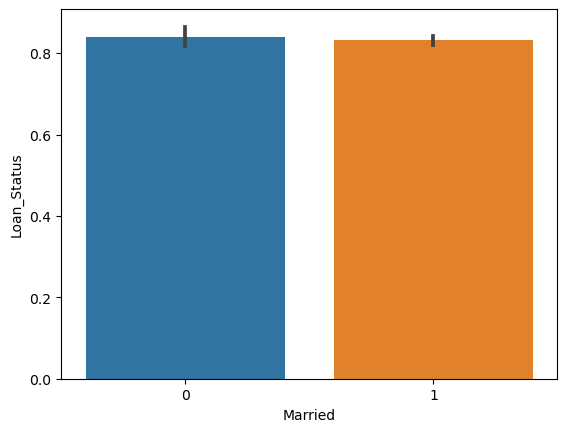

In [15]:
sns.barplot(x="Married",y="Loan_Status" , data=train_b)

<Axes: xlabel='Loan_Status', ylabel='Education'>

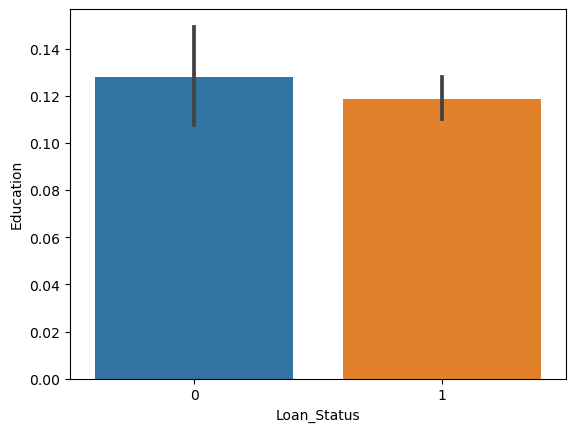

In [16]:
sns.barplot(x="Loan_Status", y='Education', data=train_b)

<Axes: xlabel='Loan_Status', ylabel='Property_Area'>

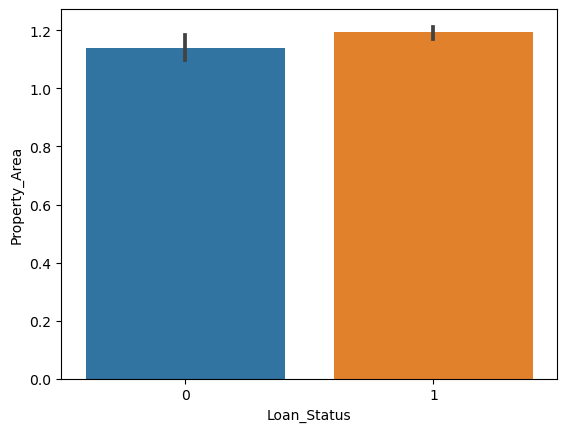

In [17]:
sns.barplot(x="Loan_Status", y='Property_Area', data=train_b)

<Axes: xlabel='Married', ylabel='Gender'>

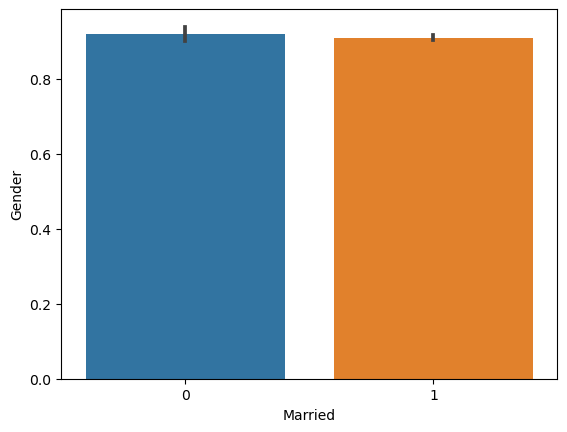

In [18]:
sns.barplot(x="Married",y="Gender" , data=train_b)

<Axes: xlabel='Loan_Status', ylabel='Credit_History'>

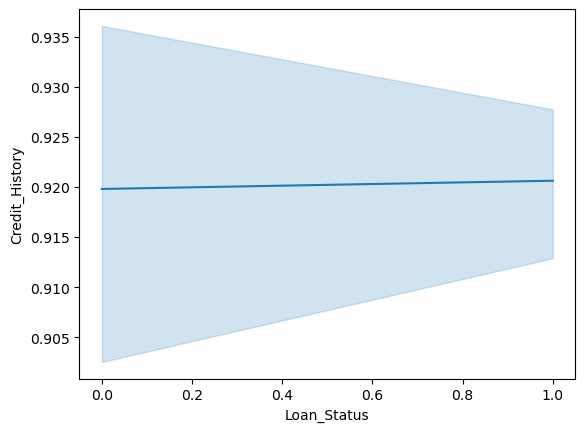

In [19]:
sns.lineplot(x='Loan_Status',y='Credit_History',data=train_b)

<Axes: xlabel='Loan_Status', ylabel='Gender'>

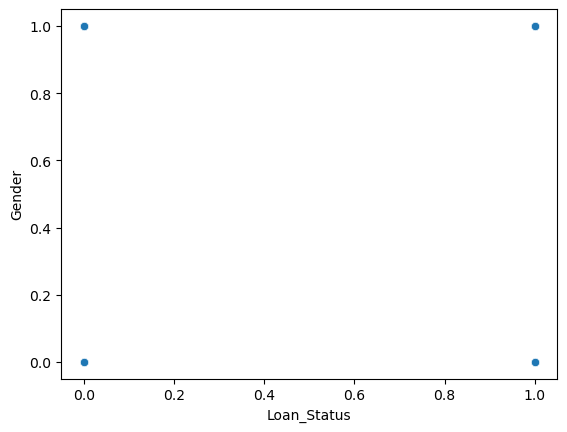

In [20]:
sns.scatterplot(x='Loan_Status',y='Gender',data=train_b)

In [21]:
train_b.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750


In [22]:
#Feature Engineering
#Only two columns, Loan_ID and Dependents have non-numeric data type"""
#The Loan_Is is not of impoprtance at the moment, so we will be dropping it"""
#And for the Dependents columnm, we will be performing one hot encoding with the use of the pd.get_dummies() method.

### features Engineering

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
train_b.loc[:,'Dependents_N'] = label_encoder.fit_transform(train_b['Dependents'].astype(str))


test_b.loc[:,'Dependents_N'] = label_encoder.fit_transform(test_b['Dependents'].astype(str))


In [24]:
train_b.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Dependents_N
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000,0
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000,0
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000,0
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750,0
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750,1


In [25]:
train_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   int64  
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   int64  
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
 15  Dependents_N       5898 non-null   int32  
dtypes: float64(1), int32(1),

In [26]:
X = train_b.drop(columns=['ID','Loan_ID','Dependents','Loan_Status','Gender','Married'], axis=1)
y= train_b['Loan_Status']

### Model Building

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [28]:
X_train,X_test,y_train,y_test= train_test_split(X,y , test_size=0.2, random_state = 42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [30]:
rf = RandomForestClassifier(n_estimators =  800,min_samples_split = 5, min_samples_leaf =  1,max_features =  'log2',max_depth = 70,bootstrap=True )


In [31]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=70, max_features='log2', min_samples_split=5,
                       n_estimators=800)

In [32]:
# Evaluate model on test set
y_pred = rf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8398305084745763


In [33]:
# Print classification report
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.01      0.01       187
           1       0.84      1.00      0.91       993

    accuracy                           0.84      1180
   macro avg       0.55      0.50      0.46      1180
weighted avg       0.75      0.84      0.77      1180



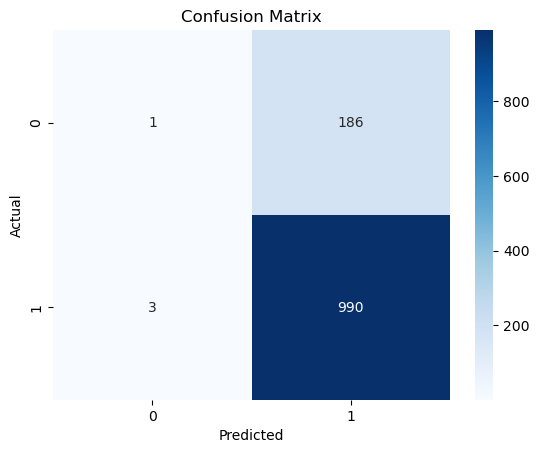

In [34]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
test_c= test_b.drop(columns=['Loan_ID','Dependents','ID','Gender','Married'] ,axis=1)

In [36]:
predictions =rf.predict(test_c)

In [37]:
sub_b['Loan_Status']= predictions

In [38]:
sub_b.to_csv("RANDOM FOREST baseline model.csv", index=False)

In [39]:
sub_b.head()

,ID,Loan_Status
0,70607,1
1,58412,1
2,88755,1
3,97271,1
4,70478,1
